In [40]:
import os
import PyPDF2
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
# Download NLTK resources if you haven't done so
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')



In [38]:
!pip install PyPDF2

In [42]:
#import pdf file
def extract_text_from_pdf(pdf_file_path):
    """Extracts text from a PDF file."""
    text = ""
    with open(pdf_file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text


Most common words in EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf:
[('year', 103), ('growth', 94), ('sales', 72), ('fiscal', 69), ('retail', 51), ('estée', 47), ('lauder', 46), ('companies', 40), ('also', 39), ('china', 38)]
Positive words in EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf: {'happy', 'bonus', 'profitable', 'commitment', 'ability', 'dynamics', 'committed', 'true', 'focused', 'want', 'strong', 'advanced', 'loyalty', 'promising', 'ensure', 'growing', 'pretty', 'reassure', 'curious', 'privilege', 'win', 'support', 'exciting', 'please', 'winning', 'hope', 'like', 'security', 'freestanding', 'integrity', 'gained', 'thank', 'super', 'encouraged', 'confident', 'thanks', 'dynamic', 'honor', 'good', 'challenging', 'importantly', 'engaging', 'improvement', 'create', 'beautiful', 'engagement', 'fitness', 'respective', 'positive', 'growth', 'profit', 'improving', 'strengthen', 'impressive', 'securitie

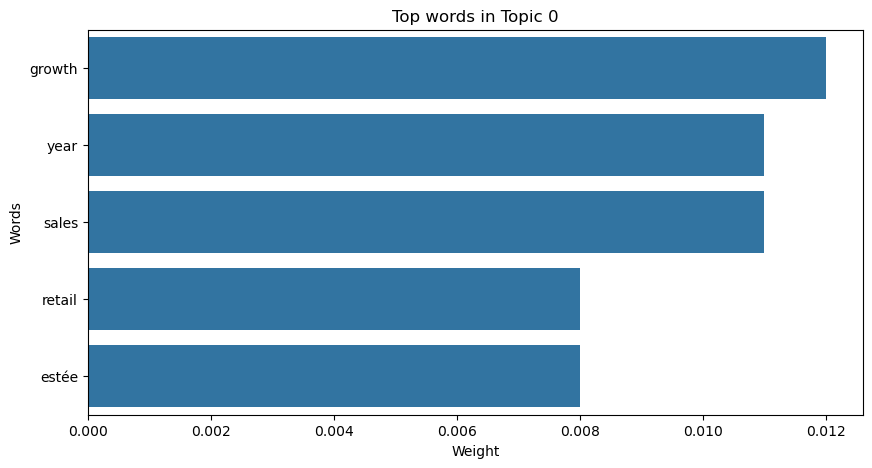

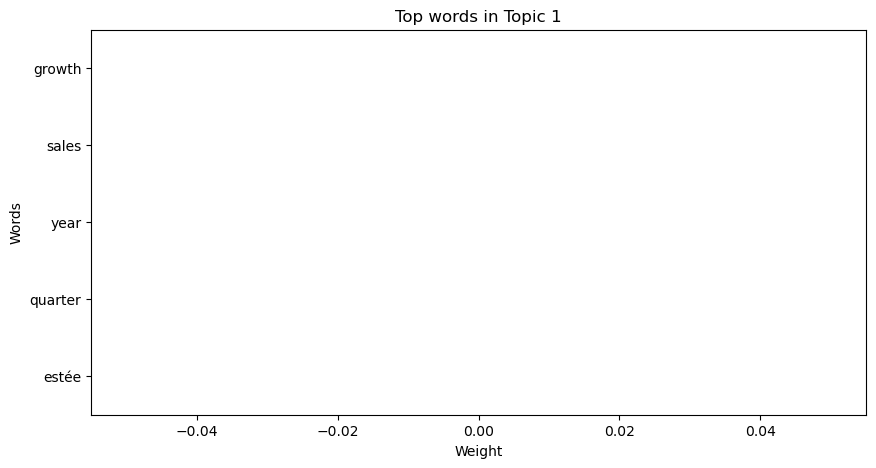

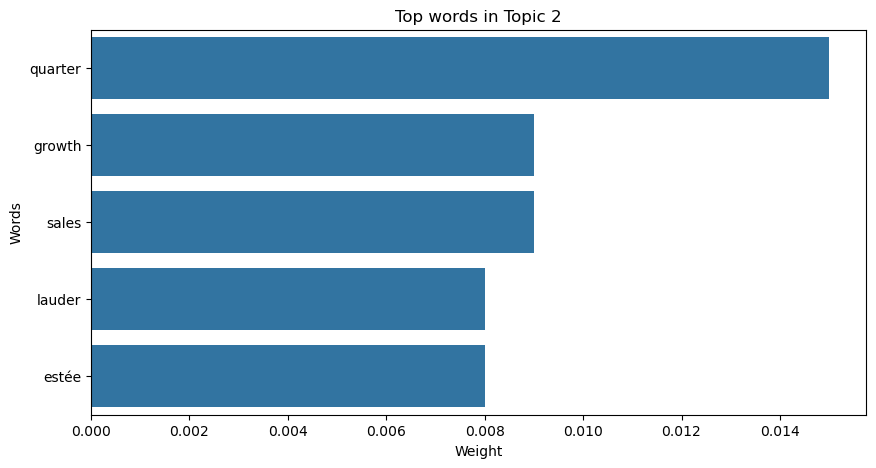

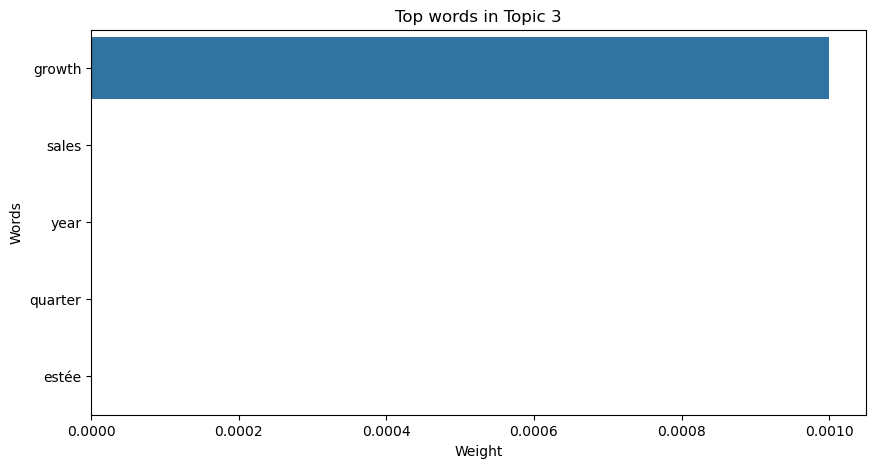

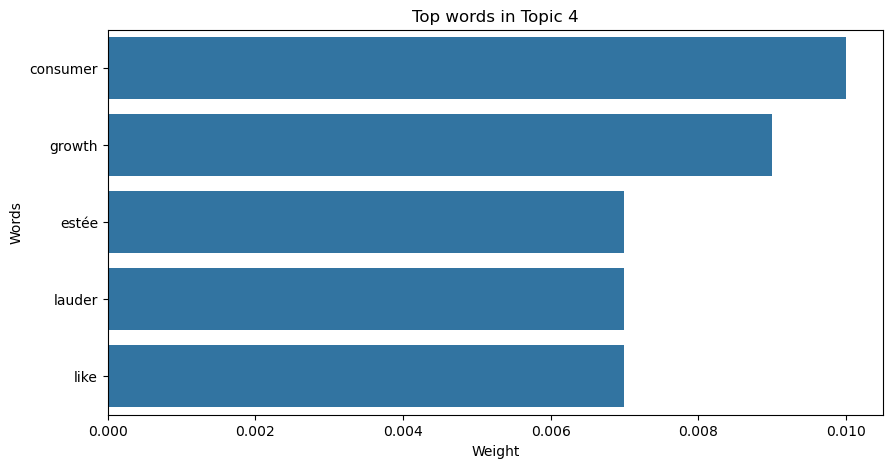

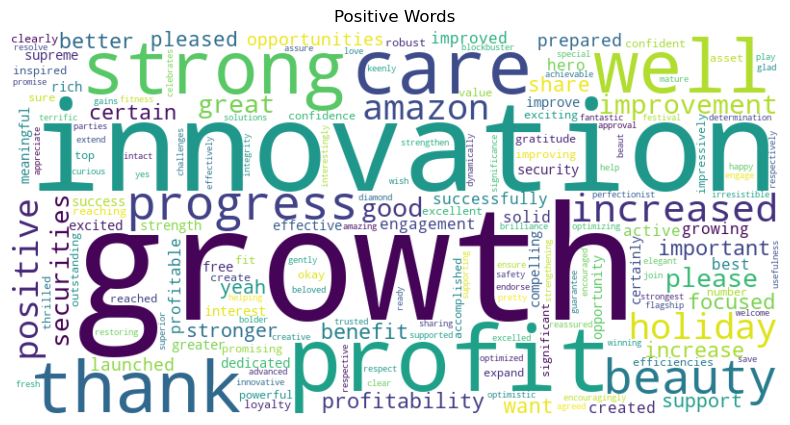

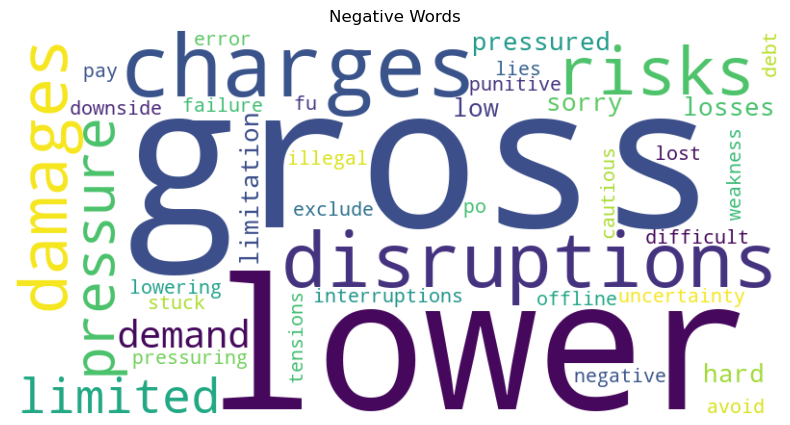


Topic distribution for each document:
Document 1: [(0, 0.9998646)]
Document 2: [(0, 0.012921359), (4, 0.98697287)]
Document 3: [(0, 0.9998511)]
Document 4: [(0, 0.9998519)]
Document 5: [(2, 0.9917267)]


In [72]:
#textual and sentiment analysis of earnings call
def preprocess_text(text):
    """Preprocess the text for analysis."""
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

def perform_topic_modeling(documents, num_topics=5):
    """Performs LDA topic modeling on the given list of documents."""
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(documents)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return lda_model, corpus, dictionary

def report_topics(lda_model, num_words=5):
    """Reports the topics, their weights, and top words in each topic."""
    topics_info = []
    for idx, topic in lda_model.print_topics(num_words=num_words):
        topics_info.append((idx, topic))
    return topics_info

def analyze_sentiment(tokens):
    """Analyze sentiment of the tokens and return positive and negative words."""
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []

    for word in tokens:
        sentiment_score = sia.polarity_scores(word)
        if sentiment_score['compound'] > 0.05:  # positive sentiment threshold
            positive_words.append(word)
        elif sentiment_score['compound'] < -0.05:  # negative sentiment threshold
            negative_words.append(word)

    return positive_words, negative_words

def plot_topics(lda_model, num_words=5):
    """Plots the top words for each topic."""
    for idx, topic in lda_model.print_topics(num_words=num_words):
        words = [word.split('*')[1].strip('"') for word in topic.split(' + ')]
        weights = [float(word.split('*')[0]) for word in topic.split(' + ')]
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x=weights, y=words)
        plt.title(f'Top words in Topic {idx}')
        plt.xlabel('Weight')
        plt.ylabel('Words')
        plt.show()

def plot_wordcloud(words, title):
    """Plots a word cloud for the given words."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def main():
    # Path to the directory containing your earnings call PDF files
    pdf_directory = "/Users/lizsu/Downloads/Earning call"

    documents = []
    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            
            # Extract text from PDF
            text = extract_text_from_pdf(pdf_file_path)

            # Preprocess and analyze the text
            tokens = preprocess_text(text)
            documents.append(tokens)

            # Print most common words for the current file
            freq_dist = FreqDist(tokens)
            print(f"\nMost common words in {filename}:")
            print(freq_dist.most_common(10))

            # Analyze sentiment and report positive and negative words
            positive_words, negative_words = analyze_sentiment(tokens)
            print(f"Positive words in {filename}: {set(positive_words)}")
            print(f"Negative words in {filename}: {set(negative_words)}")

    # Perform topic modeling on all documents
    lda_model, corpus, dictionary = perform_topic_modeling(documents)

    # Report the topics and their weights
    print("\nTopics found by LDA:")
    topics_info = report_topics(lda_model)
    for idx, topic in topics_info:
        print(f"Topic {idx}: {topic}")

    # Plot top words for each topic
    plot_topics(lda_model)

    # Plot word clouds for positive and negative words
    plot_wordcloud(positive_words, 'Positive Words')
    plot_wordcloud(negative_words, 'Negative Words')

    # Report the topic distribution for each document
    print("\nTopic distribution for each document:")
    for i, doc in enumerate(corpus):
        topic_distribution = lda_model.get_document_topics(doc)
        print(f"Document {i + 1}: {topic_distribution}")

if __name__ == "__main__":
    main()

In [48]:
#### analyze different sections of conference calls
import os
import PyPDF2
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download NLTK resources if you haven't done so
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

In [70]:
def extract_text_from_pdf(pdf_file_path):
    """Extracts text from a PDF file."""
    text = ""
    with open(pdf_file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def extract_sections(text):
    """Extracts Management Discussion and Q&A sections from the text."""
    management_discussion = ""
    question_answer = ""
    
    # Split the text into lines for processing
    lines = text.splitlines()
    in_management_discussion = False
    in_question_answer = False

    for line in lines:
        line = line.strip()
        if "MANAGEMENT DISCUSSION" in line.upper():
            in_management_discussion = True
            in_question_answer = False
            continue
        elif "QUESTION AND ANSWER" in line.upper():
            in_question_answer = True
            in_management_discussion = False
            continue
        
        if in_management_discussion:
            management_discussion += line + " "
        elif in_question_answer:
            question_answer += line + " "

    return management_discussion, question_answer

def preprocess_text(text):
    """Preprocess the text for analysis."""
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

def perform_topic_modeling(documents, num_topics=5):
    """Performs LDA topic modeling on the given list of documents."""
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(documents)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return lda_model, corpus, dictionary

def report_topics(lda_model, num_words=5):
    """Reports the topics, their weights, and top words in each topic."""
    topics_info = []
    for idx, topic in lda_model.print_topics(num_words=num_words):
        topics_info.append((idx, topic))
    return topics_info

def analyze_sentiment(tokens):
    """Analyze sentiment of the tokens and return positive and negative words and scores."""
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []
    compound_scores = []

    for word in tokens:
        sentiment_score = sia.polarity_scores(word)
        compound_scores.append(sentiment_score['compound'])
        
        if sentiment_score['compound'] > 0.05:  # positive sentiment threshold
            positive_words.append(word)
        elif sentiment_score['compound'] < -0.05:  # negative sentiment threshold
            negative_words.append(word)

    avg_compound_score = sum(compound_scores) / len(compound_scores) if compound_scores else 0

    return positive_words, negative_words, avg_compound_score

def plot_topics(lda_model, num_words=5):
    """Plots the top words for each topic."""
    for idx, topic in lda_model.print_topics(num_words=num_words):
        words = [word.split('*')[1].strip('"') for word in topic.split(' + ')]
        weights = [float(word.split('*')[0]) for word in topic.split(' + ')]
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x=weights, y=words)
        plt.title(f'Top words in Topic {idx}')
        plt.xlabel('Weight')
        plt.ylabel('Words')
        plt.show()

def plot_wordcloud(words, title):
    """Plots a word cloud for the given words."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def analyze_section(text, section_name):
    """Analyzes a specific section of the text."""
    tokens = preprocess_text(text)
    positive_words, negative_words, avg_score = analyze_sentiment(tokens)
    
    print(f"\nMost common words in {section_name}:")
    freq_dist = FreqDist(tokens)
    print(freq_dist.most_common(10))
    
    print(f"Positive words in {section_name}: {set(positive_words)}")
    print(f"Negative words in {section_name}: {set(negative_words)}")
    print(f"Average sentiment score for {section_name}: {avg_score:.4f}")
    
    return tokens, positive_words, negative_words, avg_score

def main():
    # Path to the directory containing your earnings call PDF files
    pdf_directory = "/Users/lizsu/Downloads/Earning call"

    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            
            # Extract text from PDF
            text = extract_text_from_pdf(pdf_file_path)

            # Extract Management Discussion and Q&A sections
            management_discussion, question_answer = extract_sections(text)

            # Analyze Management Discussion section
            print(f"\nAnalysis for {filename} - Management Discussion Section:")
            md_tokens, md_positive_words, md_negative_words, md_avg_score = analyze_section(management_discussion, "Management Discussion")

            # Analyze Question and Answer section
            print(f"\nAnalysis for {filename} - Question and Answer Section:")
            qa_tokens, qa_positive_words, qa_negative_words, qa_avg_score = analyze_section(question_answer, "Question and Answer")

            # Perform topic modeling on both sections
            md_lda_model, md_corpus, md_dictionary = perform_topic_modeling([md_tokens])
            qa_lda_model, qa_corpus, qa_dictionary = perform_topic_modeling([qa_tokens])

            # Report the topics for both sections
            print("\nTopics found in Management Discussion:")
            report_topics(md_lda_model)
            
            print("\nTopics found in Question and Answer:")
            report_topics(qa_lda_model)

            # Plot topics for both sections
            plot_topics(md_lda_model)
            plot_topics(qa_lda_model)

            # Plot word clouds for positive and negative words in both sections
            plot_wordcloud(md_positive_words, 'Positive Words in Management Discussion')
            plot_wordcloud(md_negative_words, 'Negative Words in Management Discussion')
            plot_wordcloud(qa_positive_words, 'Positive Words in Question and Answer')
            plot_wordcloud(qa_negative_words, 'Negative Words in Question and Answer')

if __name__ == "__main__":
    main()


Analysis for EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('year', 103), ('growth', 94), ('sales', 72), ('fiscal', 69), ('retail', 51), ('estée', 42), ('lauder', 41), ('also', 39), ('china', 38), ('travel', 36)]
Positive words in Management Discussion: {'happy', 'bonus', 'profitable', 'commitment', 'ability', 'dynamics', 'committed', 'true', 'focused', 'want', 'strong', 'advanced', 'loyalty', 'promising', 'ensure', 'growing', 'pretty', 'reassure', 'curious', 'privilege', 'win', 'support', 'exciting', 'please', 'winning', 'hope', 'like', 'security', 'freestanding', 'integrity', 'gained', 'thank', 'super', 'encouraged', 'confident', 'thanks', 'dynamic', 'honor', 'good', 'challenging', 'importantly', 'engaging', 'improvement', 'create', 'beautiful', 'engagement', 'fitness', 'respective', 'positive', 'growth', 'profit', 'improving', 'strengthen', 'impressive', 'signific

ValueError: cannot compute LDA over an empty collection (no terms)

In [66]:
def main():
    pdf_directory = "/Users/lizsu/Downloads/Earning call"

    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            text = extract_text_from_pdf(pdf_file_path)

            management_discussion, question_answer = extract_sections(text)

            print(f"\nAnalysis for {filename} - Management Discussion Section:")
            md_tokens, md_positive_words, md_negative_words, md_avg_score = analyze_section(management_discussion, "Management Discussion")

            print(f"\nAnalysis for {filename} - Question and Answer Section:")
            qa_tokens, qa_positive_words, qa_negative_words, qa_avg_score = analyze_section(question_answer, "Question and Answer")

            # Perform topic modeling on Management Discussion
            if md_tokens and len(md_tokens) > 5:  # check if enough tokens
                md_lda_model, md_corpus, md_dictionary = perform_topic_modeling([md_tokens])
                print("\nTopics found in Management Discussion:")
                report_topics(md_lda_model)
                plot_topics(md_lda_model)
            else:
                print("Not enough Management Discussion tokens for topic modeling.")

            # Perform topic modeling on Question and Answer
            if qa_tokens and len(qa_tokens) > 5:  # check if enough tokens
                qa_lda_model, qa_corpus, qa_dictionary = perform_topic_modeling([qa_tokens])
                print("\nTopics found in Question and Answer:")
                report_topics(qa_lda_model)
                plot_topics(qa_lda_model)
            else:
                print("Not enough Question and Answer tokens for topic modeling.")

            # Plot word clouds
            if md_positive_words:
                plot_wordcloud(md_positive_words, 'Positive Words in Management Discussion')
            if md_negative_words:
                plot_wordcloud(md_negative_words, 'Negative Words in Management Discussion')
            if qa_positive_words:
                plot_wordcloud(qa_positive_words, 'Positive Words in Question and Answer')
            if qa_negative_words:
                plot_wordcloud(qa_negative_words, 'Negative Words in Question and Answer')


In [68]:
qa_tokens = tokenize(qa_text)


NameError: name 'tokenize' is not defined

In [56]:
print("QA Tokens:", qa_tokens)
print("Number of QA Tokens:", len(qa_tokens))

NameError: name 'qa_tokens' is not defined

In [60]:
pip install PyPDF2 transformers torch matplotlib nltk pandas

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/lizsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Device set to use mps:0


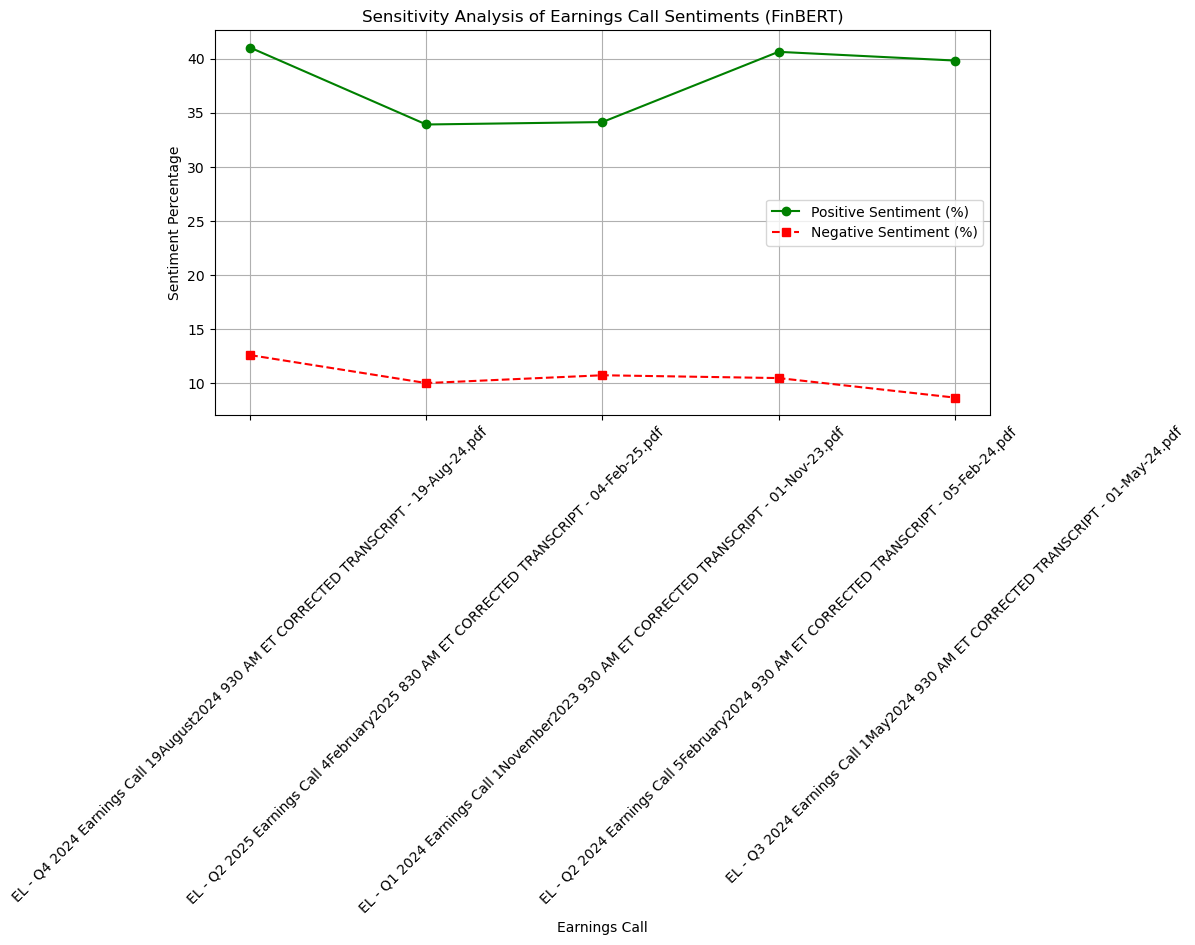

                                       Earnings Call  Positive  Neutral  \
0  EL - Q4 2024 Earnings Call 19August2024 930 AM...       176      199   
1  EL - Q2 2025 Earnings Call 4February2025 830 A...       156      258   
2  EL - Q1 2024 Earnings Call 1November2023 930 A...       156      252   
3  EL - Q2 2024 Earnings Call 5February2024 930 A...       167      201   
4  EL - Q3 2024 Earnings Call 1May2024 930 AM ET ...       184      238   

   Negative  Total Sentences  Positive %  Negative %  
0        54              429   41.025641   12.587413  
1        46              460   33.913043   10.000000  
2        49              457   34.135667   10.722101  
3        43              411   40.632603   10.462287  
4        40              462   39.826840    8.658009  


In [64]:
import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, pipeline

# Download NLTK tokenizer (if not already installed)
nltk.download("punkt")

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Folder containing earnings call PDFs
folder_path = '/Users/lizsu/Downloads/Earning call'

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to process sentences safely (truncate if >512 tokens)
def analyze_text_with_truncation(text):
    tokenized_text = tokenizer.encode(text, truncation=True, max_length=512, return_tensors="pt")
    sentiment = sentiment_pipeline(text[:512])[0]  # Only send 512 chars to avoid token mismatch
    return sentiment

# Process each PDF in the folder
sentiment_results = []
for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)
        
        # Extract text from PDF
        transcript_text = extract_text_from_pdf(file_path)
        sentences = sent_tokenize(transcript_text)

        # Run sentiment analysis with truncation
        sentiments = [analyze_text_with_truncation(sentence) for sentence in sentences]

        # Count sentiment distribution
        sentiment_counts = {
            "positive": sum(1 for s in sentiments if s["label"] == "positive"),
            "neutral": sum(1 for s in sentiments if s["label"] == "neutral"),
            "negative": sum(1 for s in sentiments if s["label"] == "negative")
        }
        
        # Store results
        sentiment_results.append({
            "Earnings Call": filename,
            "Positive": sentiment_counts["positive"],
            "Neutral": sentiment_counts["neutral"],
            "Negative": sentiment_counts["negative"],
            "Total Sentences": len(sentiments),
            "Positive %": sentiment_counts["positive"] / len(sentiments) * 100,
            "Negative %": sentiment_counts["negative"] / len(sentiments) * 100
        })

# Convert results to DataFrame
df_results = pd.DataFrame(sentiment_results)

# 🎨 Plot sensitivity analysis (Positive vs. Negative %)
plt.figure(figsize=(10, 5))
plt.plot(df_results["Earnings Call"], df_results["Positive %"], marker="o", linestyle="-", label="Positive Sentiment (%)", color="green")
plt.plot(df_results["Earnings Call"], df_results["Negative %"], marker="s", linestyle="--", label="Negative Sentiment (%)", color="red")
plt.xlabel("Earnings Call")
plt.ylabel("Sentiment Percentage")
plt.title("Sensitivity Analysis of Earnings Call Sentiments (FinBERT)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 📊 Print summarized sensitivity results
print(df_results)


In [74]:
pip install yfinance

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [76]:
import yfinance as yf
import pandas as pd

def get_stock_returns(ticker, call_date):
    # Download 2 weeks of stock data around the earnings call date
    data = yf.download(ticker, start=call_date - pd.Timedelta(days=2), end=call_date + pd.Timedelta(days=10))

    # Make sure data is sorted
    data = data.sort_index()
    
    # Find the closing price on the earnings call day (or next trading day if it's a weekend)
    call_day_price = data['Close'].iloc[0]
    
    returns = {}
    
    # Calculate returns
    if len(data) >= 2:
        returns['1_day_return'] = (data['Close'].iloc[1] - call_day_price) / call_day_price
    if len(data) >= 4:
        returns['3_day_return'] = (data['Close'].iloc[3] - call_day_price) / call_day_price
    if len(data) >= 6:
        returns['5_day_return'] = (data['Close'].iloc[5] - call_day_price) / call_day_price
    if len(data) >= 8:
        returns['1_week_return'] = (data['Close'].iloc[7] - call_day_price) / call_day_price

    return returns


In [78]:
from datetime import datetime

ticker = "EL"  # Estée Lauder ticker
call_date = pd.to_datetime("2024-08-19")  # Your earnings call date

returns = get_stock_returns(ticker, call_date)
print(returns)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

{'1_day_return': Ticker
EL   -0.020248
dtype: float64, '3_day_return': Ticker
EL   -0.015186
dtype: float64, '5_day_return': Ticker
EL    0.017771
dtype: float64, '1_week_return': Ticker
EL   -0.004954
dtype: float64}


In [88]:
print(f"Sentiment score: {md_avg_score}")
print(f"Returns: {returns}")


NameError: name 'md_avg_score' is not defined

In [82]:
def main():
    pdf_directory = "/Users/lizsu/Downloads/Earning call"

    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            text = extract_text_from_pdf(pdf_file_path)

            management_discussion, question_answer = extract_sections(text)

            print(f"\nAnalysis for {filename} - Management Discussion Section:")
            md_tokens, md_positive_words, md_negative_words, md_avg_score = analyze_section(management_discussion, "Management Discussion")

            print(f"\nAnalysis for {filename} - Question and Answer Section:")
            qa_tokens, qa_positive_words, qa_negative_words, qa_avg_score = analyze_section(question_answer, "Question and Answer")

            # Now get returns
            ticker = "EL"  # Example: Estée Lauder
            call_date = pd.to_datetime("2024-08-19")  # Example: from your filename
            returns = get_stock_returns(ticker, call_date)

            # 🔥 Print inside main
            print(f"Sentiment score: {md_avg_score}")
            print(f"Returns: {returns}")


In [96]:
def main():
    # Your code
    return md_avg_score, returns

md_avg_score, returns = main()
print(f"Sentiment score: {md_avg_score}")
print(f"Returns: {returns}")


NameError: name 'md_avg_score' is not defined

In [94]:
def main():
    import os
    import pandas as pd

    pdf_directory = "/Users/lizsu/Downloads/Earning call"

    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            text = extract_text_from_pdf(pdf_file_path)

            management_discussion, question_answer = extract_sections(text)

            print(f"\nAnalysis for {filename} - Management Discussion Section:")
            md_tokens, md_positive_words, md_negative_words, md_avg_score = analyze_section(management_discussion, "Management Discussion")

            print(f"\nAnalysis for {filename} - Question and Answer Section:")
            qa_tokens, qa_positive_words, qa_negative_words, qa_avg_score = analyze_section(question_answer, "Question and Answer")

            # Now, pull stock price returns
            ticker = "EL"  # Estée Lauder
            call_date = pd.to_datetime("2024-08-19")  # Fix later if you want it automatic
            returns = get_stock_returns(ticker, call_date)

            # ✅ Printing INSIDE main()
            print(f"Sentiment score for Management Discussion: {md_avg_score}")
            print(f"Stock Returns: {returns}")

if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed


Analysis for EL - Q4 2024 Earnings Call 19August2024 930 AM ET CORRECTED TRANSCRIPT - 19-Aug-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('year', 103), ('growth', 94), ('sales', 72), ('fiscal', 69), ('retail', 51), ('estée', 42), ('lauder', 41), ('also', 39), ('china', 38), ('travel', 36)]
Positive words in Management Discussion: {'happy', 'bonus', 'profitable', 'commitment', 'ability', 'dynamics', 'committed', 'true', 'focused', 'want', 'strong', 'advanced', 'loyalty', 'promising', 'ensure', 'growing', 'pretty', 'reassure', 'curious', 'privilege', 'win', 'support', 'exciting', 'please', 'winning', 'hope', 'like', 'security', 'freestanding', 'integrity', 'gained', 'thank', 'super', 'encouraged', 'confident', 'thanks', 'dynamic', 'honor', 'good', 'challenging', 'importantly', 'engaging', 'improvement', 'create', 'beautiful', 'engagement', 'fitness', 'respective', 'positive', 'growth', 'profit', 'improving', 'strengthen', 'impressive', 'signific


[*********************100%***********************]  1 of 1 completed


Analysis for EL - Q2 2025 Earnings Call 4February2025 830 AM ET CORRECTED TRANSCRIPT - 04-Feb-25.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('sales', 42), ('growth', 40), ('consumer', 30), ('quarter', 25), ('beauty', 24), ('retail', 24), ('business', 20), ('net', 20), ('new', 18), ('prgp', 17)]
Positive words in Management Discussion: {'profitable', 'committed', 'optimizing', 'meaningful', 'true', 'energized', 'focused', 'want', 'strong', 'advanced', 'gain', 'assets', 'support', 'exciting', 'win', 'please', 'vision', 'like', 'ha', 'freestanding', 'ly', 'optimally', 'thank', 'confident', 'encouraged', 'dynamic', 'creativity', 'honor', 'good', 'create', 'improvement', 'engagement', 'efficiencies', 'satisfied', 'growth', 'profit', 'improving', 'significant', 'reaching', 'boldly', 'launched', 'effective', 'optimize', 'excel', 'ok', 'efficient', 'shared', 'innovate', 'honored', 'clear', 'talent', 'certain', 'gratitude', 'gains', 'share', 'improved', 


[*********************100%***********************]  1 of 1 completed


Analysis for EL - Q1 2024 Earnings Call 1November2023 930 AM ET CORRECTED TRANSCRIPT - 01-Nov-23.pdf - Management Discussion Section:

Most common words in Management Discussion:
[]
Positive words in Management Discussion: set()
Negative words in Management Discussion: set()
Average sentiment score for Management Discussion: 0.0000

Analysis for EL - Q1 2024 Earnings Call 1November2023 930 AM ET CORRECTED TRANSCRIPT - 01-Nov-23.pdf - Question and Answer Section:

Most common words in Question and Answer:
[('retail', 44), ('companies', 29), ('estée', 28), ('year', 28), ('lauder', 27), ('question', 26), ('llc', 22), ('business', 22), ('travel', 22), ('sales', 20)]
Positive words in Question and Answer: {'profitable', 'committed', 'true', 'focused', 'want', 'strong', 'advanced', 'growing', 'pretty', 'support', 'please', 'sharing', 'yes', 'like', 'security', 'abilities', 'integrity', 'ly', 'thank', 'encouraged', 'thanks', 'giving', 'perfect', 'good', 'importantly', 'create', 'fitness', 'r


[*********************100%***********************]  1 of 1 completed


Analysis for EL - Q2 2024 Earnings Call 5February2024 930 AM ET CORRECTED TRANSCRIPT - 05-Feb-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('sales', 49), ('growth', 40), ('year', 35), ('quarter', 26), ('net', 25), ('organic', 24), ('brand', 19), ('fiscal', 18), ('second', 18), ('half', 18)]
Positive words in Management Discussion: {'festival', 'happy', 'commitment', 'profitable', 'meaningful', 'diamond', 'true', 'focused', 'strengthening', 'strong', 'attract', 'loyalty', 'promising', 'engaged', 'support', 'exciting', 'win', 'please', 'winning', 'like', 'healthy', 'freestanding', 'actively', 'ly', 'thank', 'confident', 'encouraged', 'good', 'engaging', 'create', 'engagement', 'amazing', 'excited', 'improvement', 'growth', 'profit', 'significant', 'launched', 'effective', 'excel', 'compelling', 'rich', 'supporting', 'welcoming', 'safety', 'interest', 'outstanding', 'appreciate', 'terrific', 'certain', 'gratitude', 'gains', 'respectively', 'smart'


[*********************100%***********************]  1 of 1 completed


Analysis for EL - Q3 2024 Earnings Call 1May2024 930 AM ET CORRECTED TRANSCRIPT - 01-May-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('sales', 54), ('quarter', 52), ('growth', 46), ('year', 41), ('net', 29), ('brand', 25), ('innovation', 25), ('estée', 23), ('lauder', 23), ('third', 23)]
Positive words in Management Discussion: {'dynamically', 'beaut', 'happy', 'profitable', 'meaningful', 'optimizing', 'diamond', 'focused', 'want', 'strong', 'advanced', 'keenly', 'loyalty', 'promising', 'mature', 'assets', 'support', 'exciting', 'please', 'blockbuster', 'sharing', 'winning', 'like', 'creative', 'fresh', 'security', 'restoring', 'thank', 'confident', 'encouraged', 'good', 'create', 'engagement', 'improvement', 'excited', 'dedicated', 'efficiencies', 'positive', 'growth', 'profit', 'improving', 'strengthen', 'significant', 'determination', 'launched', 'effective', 'resolve', 'compelling', 'optimized', 'rich', 'engagements', 'irresistible', 'valu

In [92]:
def analyze_sentiment(tokens):
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []
    compound_scores = []

    for word in tokens:
        sentiment_score = sia.polarity_scores(word)
        compound_scores.append(sentiment_score['compound'])

        if sentiment_score['compound'] > 0.05:
            positive_words.append(word)
        elif sentiment_score['compound'] < -0.05:
            negative_words.append(word)

    avg_compound_score = sum(compound_scores) / len(compound_scores) if compound_scores else 0

    # ✅ Make sure you return three things
    return positive_words, negative_words, avg_compound_score
